In [3]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

Funkcje

In [4]:
def f1(x):
    return np.exp(-x**2) * np.log(x)**2

def f2(x):
    return 1 / (x**3 - 2*x -5)

def f3(x):
    return x**5 * np.exp(-x) * np.sin(x)

def f4(x, y):
    return 1 / (np.sqrt(x + y) * (1 + x + y))

def f5(x, y):
    return x**2 + y**2

In [5]:
def plot_1d(f, intervals, n=100):
    mesh = np.array([])
    for interval in intervals:
        new_mesh = np.linspace(*interval, n)
        mesh = np.hstack((mesh, new_mesh))
    values = np.vectorize(f)(mesh)
    plt.plot(mesh, values)
    plt.show()

def plot_2d(f, x, y):
    ax = plt.figure().add_subplot(projection='3d')
    x, y = np.meshgrid(x, y)
    values = np.vectorize(f)(x, y)
    ax.plot_surface(x, y, values)
    plt.show()

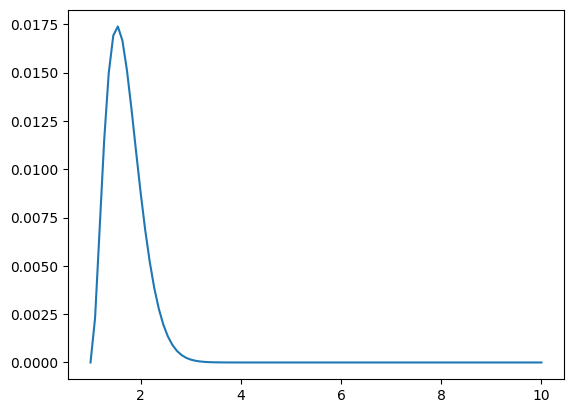

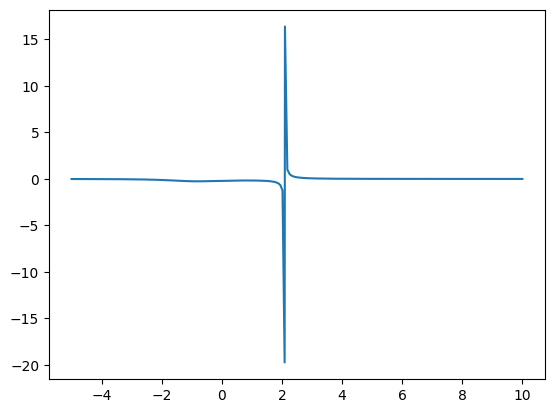

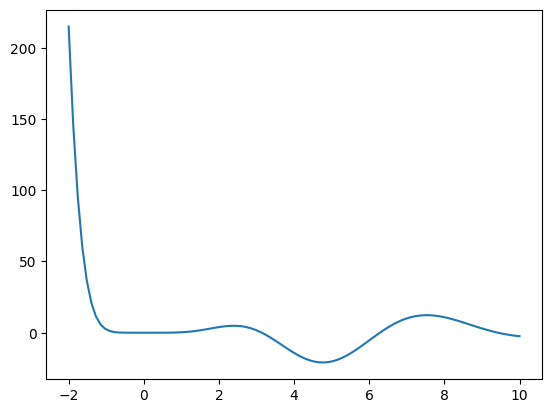

In [6]:
plot_1d(f1, [(1, 10)])
plot_1d(f2, [(-5, 2.09), (2.1, 10)])
plot_1d(f3, [(-2, 10)])

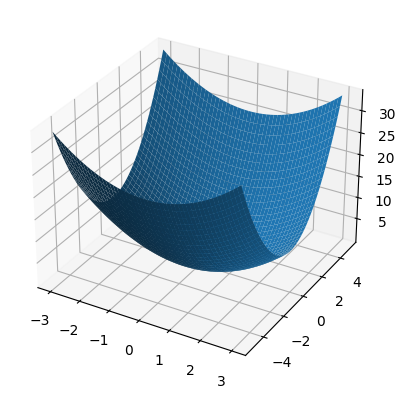

In [7]:
plot_2d(f5, np.linspace(-3, 3), np.linspace(-5, 5))

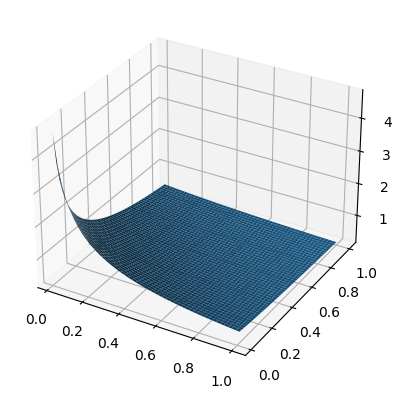

In [8]:
plot_2d(f4, np.linspace(0, 1)[1:], np.linspace(0, 1)[1:])

Zad 1

In [9]:
def trapezoidal_integration(x, y):
    x *= 3.6
    integral = 0
    for i in range(1, len(y)):
        step = x[i] - x[i-1]
        integral += (y[i] + y[i-1]) * step / 2
    integral /= 1000
    print(f"Custom integration {integral}, Library {integrate.trapezoid(y, x) / 1000}")

In [10]:
trapezoidal_integration(np.linspace(0, 100, 1000), np.sin(np.linspace(0, 100, 1000)) + 5)

Custom integration 1.8004952381199186, Library 1.8004952381199204


Zad 2

In [11]:
def simpson_integration(f, x):
    h = (x[1] - x[0]) / 2
    integral = 0
    for i in range(1, len(x)):
        integral += f(x[i]) + f(x[i-1]) + 4*f((x[i] + x[i-1]) / 2)
    integral *= h / 3
    print(f"Custom integration {integral}, Library {integrate.simpson(np.vectorize(f)(x), x)}")

In [12]:
simpson_integration(f1, np.linspace(1, 10, 1000))

Custom integration 0.01446512563808898, Library 0.01446514737946219


In [13]:
simpson_integration(f2, np.linspace(-5, 2.09, 1000))

Custom integration -1.2635347510584627, Library -1.2715320834284498


In [14]:
simpson_integration(f2, np.linspace(2.1, 10, 1000))

Custom integration 0.48474943657516045, Library 0.49164340555345765


In [15]:
simpson_integration(f3, np.linspace(-2, 10, 10000))

Custom integration 47.49992896066361, Library 47.49992906628537


Zad 3.1

In [16]:
def swap_args(func):
    return lambda x, y: func(y, x)

def double_integral(func, *args):
    val, error = integrate.dblquad(swap_args(func), *args)
    print(f"Value of integral {val}, estimate error {error}")

In [17]:
double_integral(f4, 0, 1, lambda x: 0, lambda x: 1 - x)

Value of integral 0.42920367320510433, estimate error 2.1056482351392467e-08


Zad 3.2

In [18]:
double_integral(f5, -3, 3, lambda x: -5, lambda x: 5)

Value of integral 680.0, estimate error 7.549516567451064e-12


In [19]:
def custom_double_integral(func, min_x, max_x, min_y, max_y, n_x, n_y):
    integral = 0
    x = min_x
    dx = (max_x - min_x) / n_x
    while x < max_x:
        dy = (max_y(x) - min_y(x)) / n_y
        y = min_y(x)
        part_int = 0
        while y < max_y(x):
            next_y = y + dy
            part_int += (func(x, y) + func(x, next_y)) / 2
            y = next_y
        integral += part_int * dy
        x += dx
    print(f"Integral value {integral * dx}")

In [20]:
custom_double_integral(f5, -3, 3, lambda x: -5, lambda x: 5, 100, 80)

Integral value 680.1922499999998


In [21]:
custom_double_integral(f5, -3, 3, lambda x: -5, lambda x: 5, 500, 400)

Integral value 680.0076899999988
